In [1]:
from flasc import time_operations as top
import pandas as pd
import matplotlib.pyplot as plt
from datetime import timedelta as td
import numpy as np
from floris.utilities import wrap_360

from flasc import utilities as fsut
from itertools import product

# Grab the demo data set

In [2]:
df = pd.read_feather('../examples/demo_dataset/demo_dataset_scada_60s.ftr')
df.head()

,wd_truth,ws_truth,ti_truth,time,pow_000,pow_001,pow_002,pow_003,pow_004,pow_005,...,ti_004,ti_005,ti_006,is_operation_normal_000,is_operation_normal_001,is_operation_normal_002,is_operation_normal_003,is_operation_normal_004,is_operation_normal_005,is_operation_normal_006
0,93.1,2.183,0.050,2019-01-01 00:00:00+00:00,6.405615,6.482248,1.185549,0.00000,0.000000,6.729775,...,0.122599,0.058567,0.045125,True,True,True,True,True,True,True
1,92.4,2.240,0.043,2019-01-01 00:01:00+00:00,8.943440,8.310691,2.461076,0.02256,0.235839,8.672711,...,0.125032,0.039555,0.054716,True,True,True,True,True,True,True
2,94.1,1.811,0.094,2019-01-01 00:02:00+00:00,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.155514,0.091760,0.098089,True,True,True,True,True,True,True
3,94.3,1.949,0.046,2019-01-01 00:03:00+00:00,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.114109,0.055571,0.060104,True,True,True,True,True,True,True
4,97.8,1.773,0.058,2019-01-01 00:04:00+00:00,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.137675,0.075305,0.064930,True,True,True,True,False,True,True


In [3]:
# Limit to certain columns
cols_to_keep = [c for c in df.columns if (('time' in c) or ('pow' in c) or (('wd' in c) and (not 'truth' in c)))]
cols_to_keep

['time',
 'pow_000',
 'pow_001',
 'pow_002',
 'pow_003',
 'pow_004',
 'pow_005',
 'pow_006',
 'wd_000',
 'wd_001',
 'wd_002',
 'wd_003',
 'wd_004',
 'wd_005',
 'wd_006']

In [4]:
df = df[cols_to_keep]
df.head()

,time,pow_000,pow_001,pow_002,pow_003,pow_004,pow_005,pow_006,wd_000,wd_001,wd_002,wd_003,wd_004,wd_005,wd_006
0,2019-01-01 00:00:00+00:00,6.405615,6.482248,1.185549,0.00000,0.000000,6.729775,6.786174,133.170454,121.479585,91.155655,74.117260,58.440878,97.341421,139.092672
1,2019-01-01 00:01:00+00:00,8.943440,8.310691,2.461076,0.02256,0.235839,8.672711,8.693084,135.994009,123.411998,88.083258,73.670419,56.222944,99.887287,133.695356
2,2019-01-01 00:02:00+00:00,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,137.470969,118.794243,91.613862,76.909774,56.891231,96.839061,138.489522
3,2019-01-01 00:03:00+00:00,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,138.671640,124.365381,96.755898,69.242396,60.807438,97.778890,135.174536
4,2019-01-01 00:04:00+00:00,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,146.296897,123.242456,101.477371,81.471084,63.868700,106.234625,141.270259


In [5]:
# Limit to two days
df = df.iloc[:60*24*2]

In [6]:
df.shape

(2880, 15)

In [7]:
cols_angular = [c for c in df.columns if 'wd' in c]
cols_angular

['wd_000', 'wd_001', 'wd_002', 'wd_003', 'wd_004', 'wd_005', 'wd_006']

In [8]:
# Show current method
df_base = top.df_downsample(df,cols_angular,td(seconds=600))
df_base.head()

,pow_000,pow_001,pow_002,pow_003,pow_004,pow_005,pow_006,wd_000,wd_001,wd_002,wd_003,wd_004,wd_005,wd_006
time,,,,,,,,,,,,,,
2019-01-01 00:10:00+00:00,1.534906,1.479294,0.364662,0.002256,0.023584,1.540249,1.547926,141.046153,125.974682,98.231543,78.570033,64.125446,104.326837,142.301844
2019-01-01 00:20:00+00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,147.126833,133.985411,105.553322,84.271798,70.937545,110.487569,149.500001
2019-01-01 00:30:00+00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,150.881538,138.128980,110.749166,88.846144,75.879720,114.861429,154.133860
2019-01-01 00:40:00+00:00,0.878744,0.205318,0.884698,0.180149,0.234771,0.171140,0.889442,163.838397,149.007923,121.694382,101.688017,87.000600,127.802528,164.240224
2019-01-01 00:50:00+00:00,7.893420,0.800202,6.807053,0.731444,2.109681,0.332524,7.965435,167.784796,153.798066,128.696113,104.777210,91.038314,132.278979,167.658201


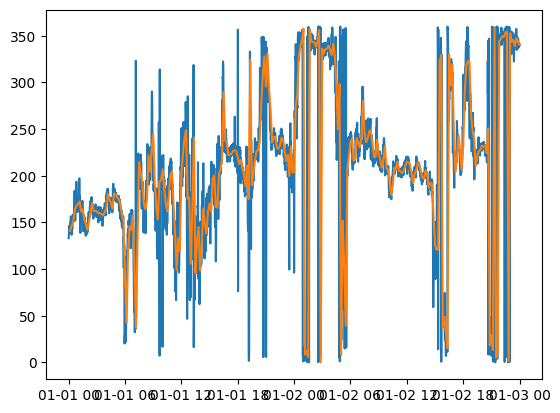

In [9]:
plt.plot(df.time,df.wd_000)
plt.plot(df_base.wd_000)

## Define an alternative

In [19]:
def df_downsample(
    df_in,
    cols_angular,
    window_width=td(seconds=60),
    min_periods=1,
    center=False,
    calc_median_min_max_std=False
):

    # Copy and ensure dataframe is indexed by time
    df = df_in.copy()
    
    if "time" not in df.columns:
        raise('ERROR TIME MUST BE COLUMNS')
        
    df = df.set_index('time')

    # Find non-angular columns
    cols_regular = [c for c in df.columns if c not in cols_angular]

    # Create named sin and cos columns for each angular signal
    sin_cols = ["{:s}_sin".format(c) for c in cols_angular]
    cos_cols = ["{:s}_cos".format(c) for c in cols_angular]

    # Add in the sin/cos columns
    df = pd.concat([df, np.sin(df[cols_angular] * np.pi / 180.0).set_axis(sin_cols, axis=1)], axis=1)
    df = pd.concat([df, np.cos(df[cols_angular] * np.pi / 180.0).set_axis(cos_cols, axis=1)], axis=1)

    # Drop angular columns
    df = df.drop(columns=cols_angular)

    # Add _N for each variable to keep track of n.o. data points
    cols_all = df.columns
    cols_N = ["{:s}_N".format(c) for c in cols_all]
    df = pd.concat([df, 1 - df[cols_all].isna().astype(int).set_axis(cols_N, axis=1)], axis=1)

    # Now calculate downsampled dataframe, automatically
    # mark by label on the right (i.e., "past 10 minutes").
    df_resample = df.resample(window_width, label="right", axis=0)

    # First calculate mean values of non-angular columns
    df_mean = df_resample[cols_regular].mean().copy()

    # Compute and append the angular means
    df_mean =pd.concat([df_mean, pd.DataFrame(wrap_360(np.arctan2(
                                            df_resample[sin_cols].mean().values,
                                            df_resample[cos_cols].mean().values) * 180.0 / np.pi),
                                             columns=cols_angular,
                                             index = df_mean.index)
                       ], axis=1)

    # Check if we have enough samples for every measurement
    if min_periods > 1:
        N_counts = df_resample[cols_N].sum()
        df_mean[N_counts < min_periods] = None  # Remove data relying on too few samples



    # Calculate median, min, max, std if necessary
    if calc_median_min_max_std:
        
        df_stats = df_in.copy().set_index('time')
        
        # Compute the stats for the non_angular columns
        df_stats_regular =  (df_stats
            [cols_regular] # Select non-angular columns
            .resample(window_width, label="right", axis=0) # Resample to desired window
            .agg(["median", "min", "max", "std"]) # Perform aggregations
            .pipe(lambda df_: top.flatten_cols(df_)) # Flatten columns
            
        )

        
        # Now to compute the statistics for the angular columns
        # Which reguires shifting by the mean values
        df_angular_mean_upsample = (df_mean
                   [cols_angular]
                   .reindex(df_stats.index) # Go back to original time index
                   .bfill() # Back fill the points since using right indexing
                   .ffill() # Cover any stragglers at end
        )
        
        df_angular_stats = (df_stats
                    [cols_angular]
                   .subtract(df_angular_mean_upsample) # Subtract the angular mean
                   .add(180) # Shift up by 180 (start of sequence for -180/180 wrap)
                   .mod(360) # Now wrap by 360
                   .subtract(180)
                   .resample(window_width, label="right", axis=0) # Resample to desired window
               )
        
        # Now create the individual statistics
        df_angular_median = (df_angular_stats
                     .median() # Apply the median
                     .add(df_mean[cols_angular]) # Shift back by original mean
                     .mod(360) # Wrap by 360
                     .rename({c:'%s_median' % c for c in cols_angular},axis='columns')
                    )
        
        df_angular_min = (df_angular_stats
             .min() # Apply the min
             .add(df_mean[cols_angular]) # Shift back by original mean
             .mod(360) # Wrap by 360
             .rename({c:'%s_min' % c for c in cols_angular},axis='columns')
            )
        
        df_angular_max = (df_angular_stats
             .max() # Apply the max
             .add(df_mean[cols_angular]) # Shift back by original mean
             .mod(360) # Wrap by 360
             .rename({c:'%s_max' % c for c in cols_angular},axis='columns')
            )
        
        df_angular_std = (df_angular_stats
             .std() # Apply the median
             .rename({c:'%s_std' % c for c in cols_angular},axis='columns')
            )
        
        
        # df_out is the concatination of all these matrices
        df_out = pd.concat([df_mean.rename({c:'%s_mean' % c for c in df_mean.columns},axis='columns'),
                            df_stats_regular,
                            df_angular_median,
                            df_angular_min,
                            df_angular_max,
                            df_angular_std
                            ], axis=1)
        
        df_out = df_out[sorted(df_out.columns)]
        
    else: # if not computing stats
        df_out = df_mean
        
    if center:
        # Shift time column towards center of the bin
        df_out.index = df_out.index - window_width / 2.0


    return df_out.reset_index() # Conform to new standard that between functions time is a column


# df_downsample(df,cols_angular,td(seconds=600), calc_median_min_max_std=True)


## mean only

In [20]:
# Show current method
df_base = top.df_downsample(df,cols_angular,td(seconds=600))
df_base.head()

,pow_000,pow_001,pow_002,pow_003,pow_004,pow_005,pow_006,wd_000,wd_001,wd_002,wd_003,wd_004,wd_005,wd_006
time,,,,,,,,,,,,,,
2019-01-01 00:10:00+00:00,1.534906,1.479294,0.364662,0.002256,0.023584,1.540249,1.547926,141.046153,125.974682,98.231543,78.570033,64.125446,104.326837,142.301844
2019-01-01 00:20:00+00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,147.126833,133.985411,105.553322,84.271798,70.937545,110.487569,149.500001
2019-01-01 00:30:00+00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,150.881538,138.128980,110.749166,88.846144,75.879720,114.861429,154.133860
2019-01-01 00:40:00+00:00,0.878744,0.205318,0.884698,0.180149,0.234771,0.171140,0.889442,163.838397,149.007923,121.694382,101.688017,87.000600,127.802528,164.240224
2019-01-01 00:50:00+00:00,7.893420,0.800202,6.807053,0.731444,2.109681,0.332524,7.965435,167.784796,153.798066,128.696113,104.777210,91.038314,132.278979,167.658201


In [21]:
df_new = df_downsample(df,cols_angular,td(seconds=600))
df_new.head()

,time,pow_000,pow_001,pow_002,pow_003,pow_004,pow_005,pow_006,wd_000,wd_001,wd_002,wd_003,wd_004,wd_005,wd_006
0,2019-01-01 00:10:00+00:00,1.534906,1.479294,0.364662,0.002256,0.023584,1.540249,1.547926,141.046153,125.974682,98.231543,78.570033,64.125446,104.326837,142.301844
1,2019-01-01 00:20:00+00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,147.126833,133.985411,105.553322,84.271798,70.937545,110.487569,149.500001
2,2019-01-01 00:30:00+00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,150.881538,138.128980,110.749166,88.846144,75.879720,114.861429,154.133860
3,2019-01-01 00:40:00+00:00,0.878744,0.205318,0.884698,0.180149,0.234771,0.171140,0.889442,163.838397,149.007923,121.694382,101.688017,87.000600,127.802528,164.240224
4,2019-01-01 00:50:00+00:00,7.893420,0.800202,6.807053,0.731444,2.109681,0.332524,7.965435,167.784796,153.798066,128.696113,104.777210,91.038314,132.278979,167.658201


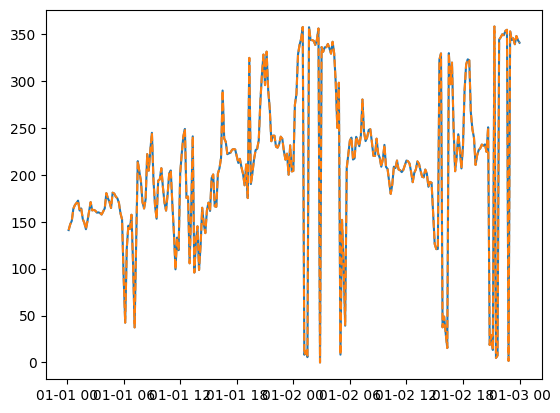

In [23]:
plt.plot(df_base.wd_000)
plt.plot(df_new.time, df_new.wd_000,'--')

## All stats

In [24]:
df_base = top.df_downsample(df,cols_angular,td(seconds=600), calc_median_min_max_std=True)
df_base.head()

,pow_000_mean,pow_001_mean,pow_002_mean,pow_003_mean,pow_004_mean,pow_005_mean,pow_006_mean,wd_000_mean,wd_001_mean,wd_002_mean,...,wd_004_max,wd_005_max,wd_006_max,wd_000_std,wd_001_std,wd_002_std,wd_003_std,wd_004_std,wd_005_std,wd_006_std
time,,,,,,,,,,,,,,,,,,,,,
2019-01-01 00:10:00+00:00,1.534906,1.479294,0.364662,0.002256,0.023584,1.540249,1.547926,141.046153,125.974682,98.231543,...,73.390764,112.032416,151.635445,4.554843,4.755869,5.989158,4.740032,5.692743,5.579235,5.511986
2019-01-01 00:20:00+00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,147.126833,133.985411,105.553322,...,79.101295,114.315417,157.468530,5.321100,2.526576,3.367641,5.120880,4.094992,2.314811,4.522152
2019-01-01 00:30:00+00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,150.881538,138.128980,110.749166,...,82.712488,120.113697,158.007401,4.790945,3.229150,2.958876,3.098943,4.347066,2.972162,3.142252
2019-01-01 00:40:00+00:00,0.878744,0.205318,0.884698,0.180149,0.234771,0.171140,0.889442,163.838397,149.007923,121.694382,...,104.594559,146.982227,185.158059,10.883943,12.079088,11.245858,12.095613,10.598995,11.192308,12.336974
2019-01-01 00:50:00+00:00,7.893420,0.800202,6.807053,0.731444,2.109681,0.332524,7.965435,167.784796,153.798066,128.696113,...,114.058948,152.651217,190.075169,12.675086,12.374404,11.761247,11.855053,10.874773,10.245453,10.943483


In [25]:
df_new = df_downsample(df,cols_angular,td(seconds=600), calc_median_min_max_std=True)
df_new.head()

,time,pow_000_max,pow_000_mean,pow_000_median,pow_000_min,pow_000_std,pow_001_max,pow_001_mean,pow_001_median,pow_001_min,...,wd_005_max,wd_005_mean,wd_005_median,wd_005_min,wd_005_std,wd_006_max,wd_006_mean,wd_006_median,wd_006_min,wd_006_std
0,2019-01-01 00:10:00+00:00,8.943440,1.534906,0.000000,0.0,3.290688,8.310691,1.479294,0.0,0.0,...,112.032416,104.326837,105.981393,96.839061,5.881031,151.635445,142.301844,142.805744,133.695356,5.810143
1,2019-01-01 00:20:00+00:00,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,...,118.040241,110.487569,111.037278,106.479544,3.413927,158.260860,149.500001,150.584223,141.027751,5.514027
2,2019-01-01 00:30:00+00:00,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,...,120.113697,114.861429,115.428592,110.442374,3.433080,158.007401,154.133860,155.571279,148.501972,3.085756
3,2019-01-01 00:40:00+00:00,6.568133,0.878744,0.000000,0.0,2.117225,2.053177,0.205318,0.0,0.0,...,146.982227,127.802528,130.244311,115.617286,10.992521,185.158059,164.240224,161.851502,153.114097,12.032882
4,2019-01-01 00:50:00+00:00,15.883890,7.893420,8.760597,0.0,5.314177,3.166769,0.800202,0.0,0.0,...,152.651217,132.278979,128.908154,118.632784,10.475016,190.075169,167.658201,164.876765,154.501311,11.431672


### Show equivalence 

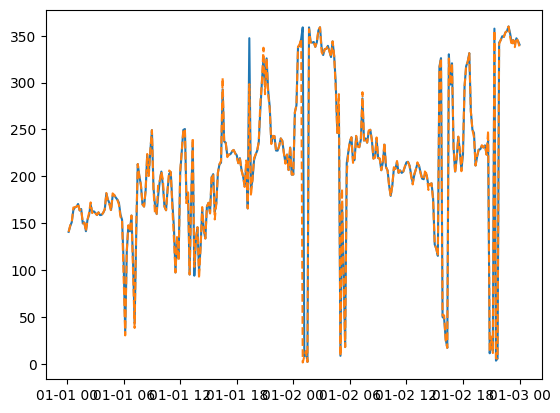

In [26]:
plt.plot(df_base.wd_000_median)
plt.plot(df_new.time, df_new.wd_000_median,'--')

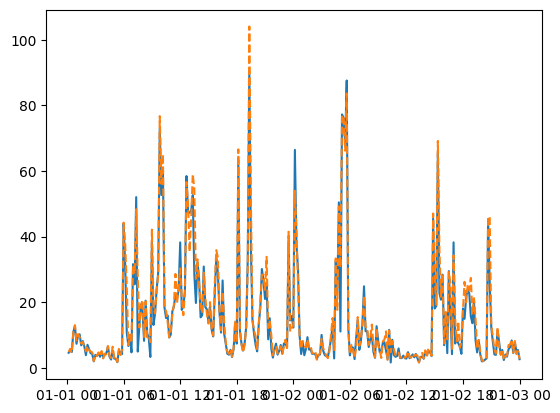

In [27]:
plt.plot(df_base.wd_000_std)
plt.plot(df_new.time, df_new.wd_000_std,'--')

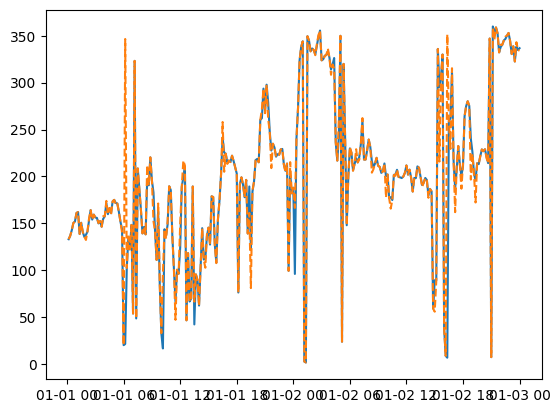

In [28]:
plt.plot(df_base.wd_000_min)
plt.plot(df_new.time, df_new.wd_000_min,'--')

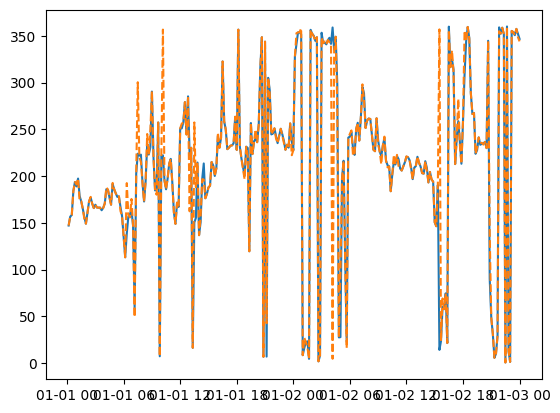

In [29]:
plt.plot(df_base.wd_000_max)
plt.plot(df_new.time, df_new.wd_000_max,'--')

## Go back to full size frame to check times

In [30]:
df = pd.read_feather('../examples/demo_dataset/demo_dataset_scada_60s.ftr')

In [31]:
%%timeit
top.df_downsample(df,cols_angular,td(seconds=600), calc_median_min_max_std=True)

/Users/pfleming/opt/anaconda3/envs/floris/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,
/Users/pfleming/Projects/FLORIS/flasc/flasc/time_operations.py:275: RuntimeWarning: All-NaN slice encountered
  values_min = wrap_360(np.nanmin(values, axis=1))
/Users/pfleming/Projects/FLORIS/flasc/flasc/time_operations.py:276: RuntimeWarning: All-NaN slice encountered
  values_max = wrap_360(np.nanmax(values, axis=1))
/Users/pfleming/opt/anaconda3/envs/floris/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1878: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/pfleming/opt/anaconda3/envs/floris/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,
/Users/pfleming/Projects/FLO

4.49 s ± 34.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


/Users/pfleming/opt/anaconda3/envs/floris/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,
/Users/pfleming/Projects/FLORIS/flasc/flasc/time_operations.py:275: RuntimeWarning: All-NaN slice encountered
  values_min = wrap_360(np.nanmin(values, axis=1))
/Users/pfleming/Projects/FLORIS/flasc/flasc/time_operations.py:276: RuntimeWarning: All-NaN slice encountered
  values_max = wrap_360(np.nanmax(values, axis=1))
/Users/pfleming/opt/anaconda3/envs/floris/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1878: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


In [32]:
%%timeit
df_downsample(df,cols_angular,td(seconds=600), calc_median_min_max_std=True)

1.03 s ± 9.67 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
